# Pressure Sensors

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from graph import Graph,rounding,latex
import scienceplots
plt.style.use(['science','notebook','grid'])

In [2]:
# Weight matrix
W = np.array(
    [[0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
     [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
     [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0],
     [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1],
     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0],
     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
    ]) 

# Creating the Graph object
G = Graph(W)

### Centralities

#### Invariant centrality

The innvariant centrality is given by $\pi = P^{T} \pi$

In [3]:
# Invarint centrality
invariant = G.invariant_centrality()
print('The invaraint centrality for each nodes is given by:')
display(latex(rounding(invariant,3)).T)

The invaraint centrality for each nodes is given by:


Matrix([[0.083, 0.083, 0.056, 0.083, 0.083, 0.056, 0.083, 0.083, 0.028, 0.056, 0.083, 0.083, 0.056, 0.056, 0.028]])

___

#### Closeness and betweness centrilty

$$Closeness = \frac{n}{\sum_j dist(i,j)}$$


$$Betweenness = \frac{1}{n^2} \sum_{i,j} g^{(k)}_{ij}$$

In [4]:
# Closeness and betwenness centrality
closeness = []
for i in range(G.size):
    closeness.append(G.closeness_centrality(i))

betweeness = G.betweenness_centrality()

print('The closeness centrality of each node is given by:')
display(latex(rounding(closeness,3)).T)

print('\n The betweenness centrality of each node is given by:')
display(latex(rounding(betweeness,3)).T)


The closeness centrality of each node is given by:


Matrix([[0.278, 0.227, 0.227, 0.375, 0.349, 0.268, 0.429, 0.312, 0.246, 0.333, 0.395, 0.349, 0.375, 0.268, 0.294]])


 The betweenness centrality of each node is given by:


Matrix([[0.264, 0, 0, 0.242, 0.253, 0, 0.56, 0.209, 0, 0.363, 0.538, 0.253, 0.242, 0, 0]])

___

#### PageRank centrality


The numerical solution is given by:
$$\pi_B(k+1) = (1 -\beta) \, P^{T} \, \pi_B(k) + \beta \, \mu$$

In [5]:
# PageRank centrality
step = 1000

# β = 0.15  ; μ_i = 1
mu_1 = np.ones(15)
beta_1 = 0.15  
pageRank1 = G.bonacich_centrality(mu_1,beta_1,step)

print('The PageRange centarlity for beta =', beta_1, 'and mu_i = 1 is:')
display(latex(rounding(pageRank1,3)).T)

# β = 0.6  ; μ_i = 0, μ_7 = 1
mu_2 = np.zeros(15)
mu_2[6] = 1
beta_2 = 0.6  
pageRank2 = G.bonacich_centrality(mu_2,beta_2,step) 
print('\nThe PageRange centarlity for beta =', beta_2, 'and mu_i = 0 for every node exept mu_7=1 is:') 
display(latex(rounding(pageRank2,3)).T)

# β = 0.5  ; μ_i = 0, μ_11 = 1
mu_3 = np.zeros(15)
mu_3[10] = 1
beta_3 = 0.5  
pageRank3 = G.bonacich_centrality(mu_3,beta_3,step)
print('\nThe PageRange centarlity for beta =', beta_3, 'and mu_i = 0 for every node exept mu_11=1 is:') 
display(latex(rounding(pageRank3,3)).T)

The PageRange centarlity for beta = 0.15 and mu_i = 1 is:


Matrix([[1.19, 1.164, 0.817, 1.161, 1.204, 0.854, 1.203, 1.278, 0.512, 0.853, 1.292, 1.241, 0.842, 0.872, 0.516]])


The PageRange centarlity for beta = 0.6 and mu_i = 0 for every node exept mu_7=1 is:


Matrix([[0.003, 0.001, 0, 0.101, 0.015, 0.002, 0.644, 0.005, 0.001, 0.013, 0.093, 0.019, 0.088, 0.003, 0.012]])


The PageRange centarlity for beta = 0.5 and mu_i = 0 for every node exept mu_11=1 is:


Matrix([[0.029, 0.008, 0.006, 0.022, 0.004, 0.001, 0.107, 0.002, 0, 0.104, 0.593, 0.005, 0.019, 0.001, 0.099]])

___

### DeGroot dynamics

The initial state is given by $x_i(0)=\theta + \xi_i$, where $\theta = 101,325 \, Pa$ and the gaussian noise has zero mean and $\sigma = 0.5 \, Pa$ as standard deviation

In [6]:
theta = 101325
xi = np.random.normal(0,0.5,15)
x_0 = np.ones(15)*theta + xi
display(latex(rounding(x_0,3)))

Matrix([
[101325.508],
[101325.491],
[101325.118],
[101324.724],
[101325.065],
[101324.498],
[101325.098],
[101324.577],
[101324.953],
[101325.421],
[101325.071],
[101324.757],
[101326.126],
[101325.227],
[101324.473]])

#### Analitic result

In [7]:
alpha = invariant.T@x_0
print('The consensus value computed analytically is:',round(alpha,3))

The consensus value computed analytically is: 101325.086


#### Numerical result

In [8]:
step = 1000
x = x_0.copy()

for i in range(step):
    x = G.normalized_matrix()@x

print('Consensus value alpha computed numerically is:', round(x[0],3))

Consensus value alpha computed numerically is: 101325.086


___

#### Self-loop

Adding a self loop to all the nodes:

In [9]:
W_loops = W.copy()

for i in range(W_loops.shape[0]):
    W_loops[i,i]=1

G_loops = Graph(W_loops)
x = x_0
for i in range(step):
    x = G_loops.normalized_matrix()@x

print('Consensus value alpha is considering all node with a self loop is:', round(x[0],3))

Consensus value alpha is considering all node with a self loop is: 101325.09


___

#### Exact average

We want now to compute the exact average state, using consensus algorithm

In [10]:
# normalize initial condition
x_0 = x_0/G.in_degree()

x_prime = x_0
for i in range(step):
    x_prime = G.normalized_matrix()@x_prime

x_0 = 1/G.in_degree()

x_second = x_0
for i in range(step):
    x_second = G.normalized_matrix()@x_second
x_second

average = x_prime[-1]/x_second[-1]
average = round(average,3)
print('Exact averange is:',average)

Exact averange is: 101325.074


___

#### Stubborn nodes

If we consider the set of stubborn nodes $ S = \{3,12\}$, with input values $u_3 = 12$, $\,u_{12} = 6$, to simulate the dynamics we fistly need to find the matrices $Q$ and $B$ such that:
$$ x(t+1) = Qx(t) + Bu$$
where 
$
P = 
\begin{pmatrix}
    Q & B \\
    0 & I \\
\end{pmatrix}
$

In [11]:
P = G.normalized_matrix()

Q = P[[0,1,3,4,5,6,7,8,9,10,12,13,14],:]
Q = Q[:,[0,1,3,4,5,6,7,8,9,10,12,13,14]]
B = P[:,[2,11]]
B = B[[0,1,3,4,5,6,7,8,9,10,12,13,14],:]

In [12]:
step = 1000
x_0 = np.zeros(13)
u = np.array([12,6])
x = x_0

x_plot = x_0.copy()

for i in range(step):
    x = Q@x + B@u
    x_plot = np.append(x_plot,x,axis=0)
x_plot = np.reshape(x_plot,(step+1,13))
display(latex(rounding(x,2)).T)

Matrix([[11.2, 11.6, 7.2, 6.8, 6.8, 7.6, 6.4, 6.4, 10.0, 8.8, 6.8, 6.0, 8.8]])

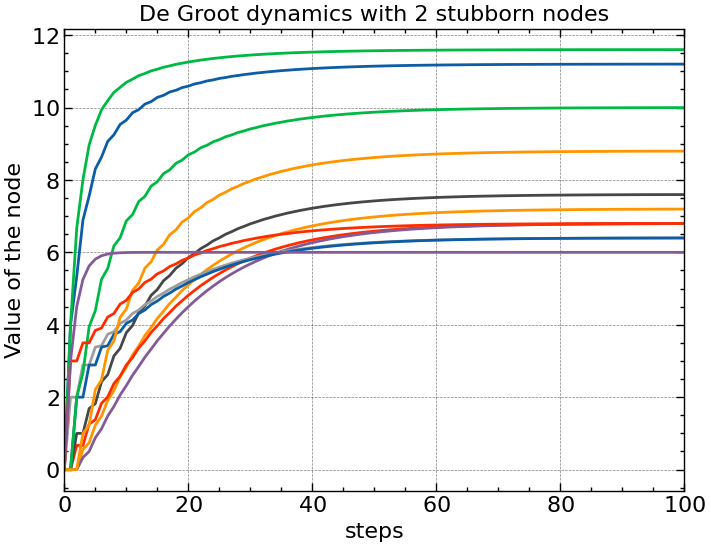

In [13]:
time = np.arange(0,step+1)
plt.figure()
for i in range(x_plot.shape[1]-1):
    plt.plot(time,x_plot[:,i])
plt.xlim(0,100)
plt.title('De Groot dynamics with 2 stubborn nodes')
plt.xlabel('steps')
plt.ylabel('Value of the node')
plt.savefig("Stubborn node simulation.png")
plt.show()

Let now consider the $11^{th}$ node as stubburn with constant value $ u_{11} = 15$

In [14]:
Q = P[[0,1,2,3,4,5,6,7,8,9,11,12,13,14],:]
Q = Q[:,[0,1,2,3,4,5,6,7,8,9,11,12,13,14]]
B = P[:,[10]]
B = B[[0,1,2,3,4,5,6,7,8,9,11,12,13,14],:]

Analitically we obtain the equilibrium just inverting the equation of the dynamics
$$ x_{eq} = (I - Q)^{-1}\,B\,u$$

In [15]:
u = np.array([15])
x_eq = np.linalg.inv(np.eye(14) - Q) @ B @ u
display(latex((rounding(x_eq,2))).T)

Matrix([[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]])

and we can see as after a sufficient iteration's step we can obtain the same result numerically :

In [16]:
x_0 = np.zeros(14)
x = x_0
x_plot = x_0.copy()

for i in range(step):
    x = Q@x + B@u
    x_plot = np.append(x_plot,x,axis=0)
x_plot = np.reshape(x_plot,(step+1,14))
display(latex(rounding(x,2)).T)

Matrix([[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]])